<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GWModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
from google.colab import files

In [193]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G4.csv to G4 (1).csv


In [210]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G4.csv
G1.csv
G11.csv
sample_data


In [211]:
#os.remove("")

In [212]:
data = pd.read_csv('G1.csv', sep=';')

In [213]:
data.head()

,date,G1,RiverLevel
0,02/06/2014,"110,738","110,659"
1,03/06/2014,"110,658","110,49"
2,04/06/2014,"110,563","110,391"
3,05/06/2014,"110,498","110,292"
4,06/06/2014,"110,428","110,234"


In [214]:
dates = data['date'].values
groundwater_level = data['G1'].values
river_water_level = data['RiverLevel'].values

In [215]:
# Concatenate the relevant input features (river water level in this case)
input_features = river_water_level

In [216]:
# Define the number of time steps for the sequence
sequence_length = 2

In [217]:
# Prepare sequences of data
X, y = [], []
for i in range(sequence_length, len(groundwater_level)):
    X.append(input_features[i - sequence_length: i])
    y.append(groundwater_level[i])

X = np.array(X)
y = np.array(y)


In [218]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [219]:
# Define a custom function to convert values with commas to floats
def custom_converter(value):
    if isinstance(value, str):
        # If the value is a string, replace commas with periods and convert to float
        try:
            return float(value.replace(',', '.'))
        except ValueError:
            return value  # Return the original value if the conversion fails
    else:
        # If the value is already a float, leave it unchanged
        return value

# Apply the custom converter to your data
X_train = [[custom_converter(value) for value in sequence] for sequence in X_train]
X_test = [[custom_converter(value) for value in sequence] for sequence in X_test]
y_train = np.array([custom_converter(value) for value in y_train])
y_test = np.array([custom_converter(value) for value in y_test])



In [220]:
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(sequence_length,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])


In [221]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Convert the data from lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [222]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 6601.0498
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 5046.0786
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 3723.1216
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 2633.5620
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 1751.4425
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 1083.3904
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 585.7172
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 256.2482
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 78.1228
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 7.8632
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 8.5562
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 40.4282
Epoch 13/50
3/3 [==============================] 

In [223]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

1/1 [==============================] - 0s 108ms/step - loss: 0.0229
Test Loss: 0.02288019098341465


In [224]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


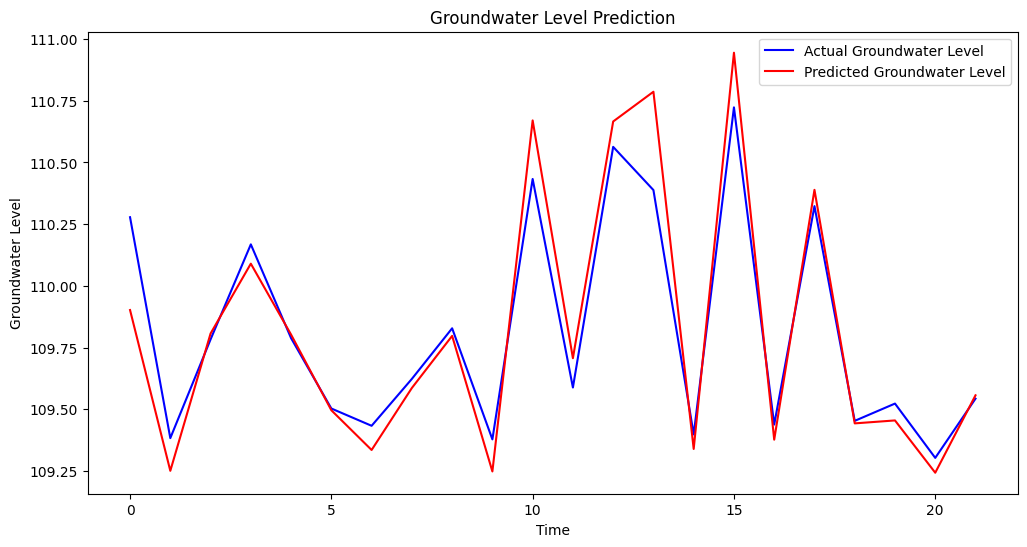

In [225]:
import matplotlib.pyplot as plt

# Plot actual groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Groundwater Level', color='blue')

# Plot predicted groundwater levels
plt.plot(predictions, label='Predicted Groundwater Level', color='red')

plt.xlabel('Time')
plt.ylabel('Groundwater Level')
plt.legend()
plt.title('Groundwater Level Prediction')

plt.show()